In [1]:
import os
import sys
import fitsio
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import matplotlib as mpl

from   astropy.table import Table
import pubplot

In [2]:
repo_root = os.environ['HOME'] + '/DESI/'

sys.path.append(repo_root)

In [3]:
from   cosmo         import cosmo, fsky

In [4]:
field  = 'G9'
dryrun = False
realz  = 0

In [5]:
fpath = os.environ['HOME'] + '/data/GAMA4/randoms/randoms_{}_{}.fits'.format(field, realz)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.0),
             ('ZMAX', 0.3),
             ('DZ', 0.0001),
             ('NRAND', 1840387),
             ('FIELD', 'G9'),
             ('AREA', 60.0),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 3680772.57902396),
             ('RAND_DENS', 0.5),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 1072.330292425316),
             ('NRAND8_PERR', 32.74645465428763)])

In [6]:
fpath = os.environ['HOME'] + '/data/GAMA4/randoms/randoms_bd_{}_{}.fits'.format(field, realz)

if dryrun:
    fpath = fpath.replace('.fits', '_dryrun.fits')

rand = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.0),
             ('ZMAX', 0.3),
             ('DZ', 0.0001),
             ('NRAND', 1840387),
             ('FIELD', 'G9'),
             ('AREA', 60.0),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 3680772.57902396),
             ('RAND_DENS', 0.5),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 1072.330292425316),
             ('NRAND8_PERR', 32.74645465428763),
             ('RSPHERE', 8.0),
             ('FILLFACTOR_INFRAC', 0.7994899985709527)])

In [7]:
rand

RANDOM_RA,RANDOM_DEC,Z,V,RANDID,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,IS_BOUNDARY,RAND_N8,FILLFACTOR,BOUND_DIST,BOUND_ID
float32,float32,float32,float32,int64,bytes4,float32,float32,float32,int64,int32,float64,float64,int64
133.47423,0.9405272,0.2864526,3233302.2,1232760,G9,-556.974,587.4571,13.289738,0,1116,1.040724120061847,28.43490772455827,16083
134.31894,2.7170353,0.22380702,1606636.1,189188,G9,-447.52417,458.292,30.398638,0,827,0.7712176050995945,3.1721533737238157,500530
135.70445,0.4862935,0.2149357,1431211.5,515250,G9,-441.6215,430.89343,5.2369323,0,1107,1.0323311836097353,26.2784922074315,790634
131.91367,1.0843172,0.24089363,1981360.8,1509699,G9,-459.30176,511.65472,13.013698,0,1083,1.0099500197374376,22.538621508334444,420093
140.69472,2.434212,0.14055249,419438.84,1742646,G9,-316.85046,259.38794,17.407366,0,591,0.551136160355333,1.5966070878706204,157310
137.50632,-0.24311876,0.2595872,2449254.8,1698015,G9,-544.1942,498.55176,-3.1316817,0,1086,1.0127476652214746,22.113879309577914,1315290
130.94986,-0.07711012,0.22866972,1708274.8,589073,G9,-428.97232,494.3492,-0.88087225,0,1039,0.9689178859715583,21.029953991608743,1166235
131.10966,1.7344025,0.105837815,182936.4,515141,G9,-204.26942,234.0787,9.407322,0,1021,0.9521320130673349,7.0653944262031745,371485
138.50697,-0.31447858,0.21604414,1452432.8,995834,G9,-464.44406,410.8047,-3.4033244,0,1143,1.0659029294181819,17.72574996876584,795849


In [8]:
fpath = os.environ['HOME'] + '/data/GAMA4/randoms/randoms_bd_ddp_n8_{}_{}.fits'.format(field, realz)

if dryrun:
    fpath = fpath.replace('.fits', '_dryrun.fits')

rand = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.0),
             ('ZMAX', 0.3),
             ('DZ', 0.0001),
             ('NRAND', 1840387),
             ('FIELD', 'G9'),
             ('AREA', 180.0),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 3680772.57902396),
             ('RAND_DENS', 0.5),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 1072.330292425316),
             ('NRAND8_PERR', 32.74645465428763),
             ('RSPHERE', 8.0),
             ('FILLFACTOR_INFRAC', 0.7994899985709527),
             ('EXTNAME', 'TilingCat'),
             ('TCOMM1', 'GAMA ID'),
             ('TUCD1', 'meta.id;meta.main'),
             ('TCOMM2', 'SDSS objid'),
             ('TUCD2', 'meta.id'),
             ('TCOMM3', 'J2000 coordinate'),
             ('TUCD3', 'pos.eq.ra'),
             ('TCOMM4', 'J2000 coordinate'),
             ('TUCD4', 'pos.eq.dec'),
             ('TCOMM5', '3-arcsec fiber magnitude'),
             ('TUCD5', 'phot.mag;em.opt.R'),
             ('TCOMM6', 'Extincti

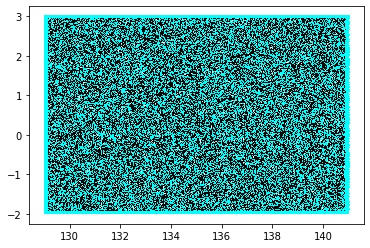

In [9]:
pl.plot(rand['RANDOM_RA'][::10], rand['RANDOM_DEC'][::10], marker=',', lw=0.0, c='k')
pl.plot(rand['RANDOM_RA'][rand['IS_BOUNDARY'].astype(bool)], rand['RANDOM_DEC'][rand['IS_BOUNDARY'].astype(bool)], marker=',', lw=0.0, c='cyan')

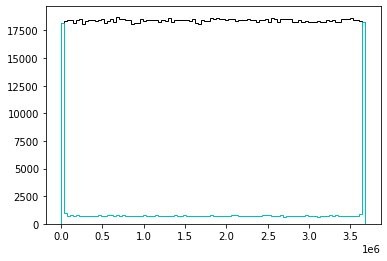

In [10]:
_ = pl.hist(rand['V'], bins=100, histtype='step', color='k')
_ = pl.hist(rand['V'][rand['IS_BOUNDARY'].astype(bool)], bins=100, histtype='step', color='c')

(0.0, 0.6)

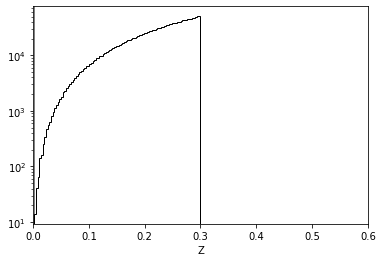

In [11]:
_ = pl.hist(rand['Z'], bins=100, histtype='step', color='k')
pl.axvline(300. / 2.9979e5, lw=0.5, c='k')
pl.yscale('log')
pl.xlabel('Z')

pl.xlim(0.0, 0.6)

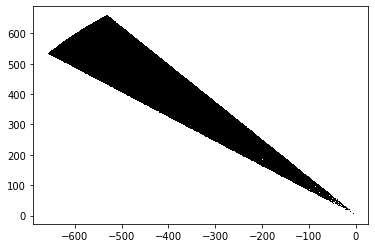

In [12]:
pl.plot(rand['CARTESIAN_X'][::10], rand['CARTESIAN_Y'][::10], marker=',', lw=0.0, c='k')

Text(0, 0.5, 'y')

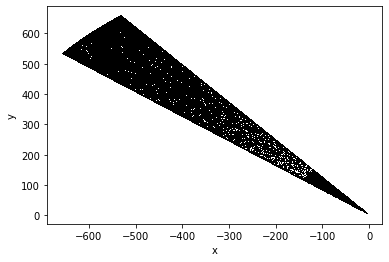

In [13]:
pl.plot(rand['CARTESIAN_X'][rand['IS_BOUNDARY'].astype(bool)], rand['CARTESIAN_Y'][rand['IS_BOUNDARY'].astype(bool)], marker=',', lw=0.0, c='k')
pl.xlabel('x')
pl.ylabel('y')

(0.0, 1000.0)

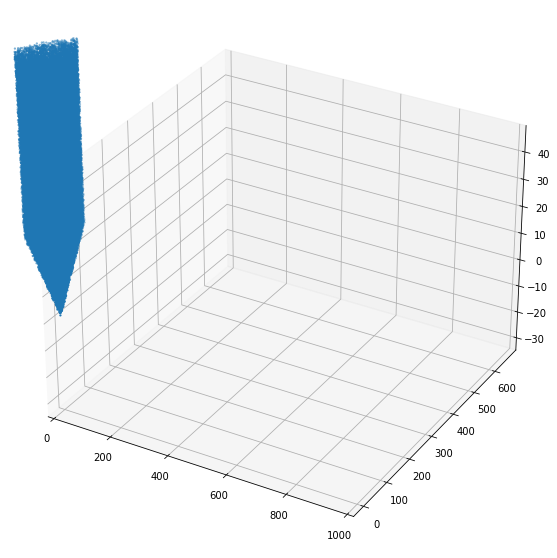

In [14]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(rand['CARTESIAN_X'][::10],\
           rand['CARTESIAN_Y'][::10],\
           rand['CARTESIAN_Z'][::10],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

(0.0, 1000.0)

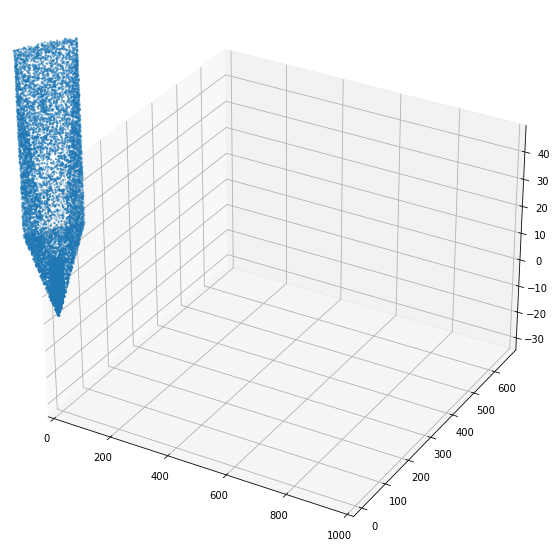

In [15]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(rand['CARTESIAN_X'][rand['IS_BOUNDARY'].astype(bool)][::10],\
           rand['CARTESIAN_Y'][rand['IS_BOUNDARY'].astype(bool)][::10],\
           rand['CARTESIAN_Z'][rand['IS_BOUNDARY'].astype(bool)][::10],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

In [16]:
np.mean(rand['V'] < np.percentile(rand['V'], 1.))

0.010000070637317043

In [17]:
np.mean(rand['IS_BOUNDARY'].data)

0.058758293771907756

In [19]:
rand.dtype.names

('RANDOM_RA',
 'RANDOM_DEC',
 'Z',
 'V',
 'RANDID',
 'FIELD',
 'CARTESIAN_X',
 'CARTESIAN_Y',
 'CARTESIAN_Z',
 'IS_BOUNDARY',
 'RAND_N8',
 'FILLFACTOR',
 'BOUND_DIST',
 'BOUND_ID',
 'DDP1_N8',
 'DDP2_N8',
 'DDP3_N8',
 'DDP1_DELTA8',
 'DDP2_DELTA8',
 'DDP3_DELTA8',
 'DDP1_DELTA8_TIER')

In [20]:
rand['RAND_N8'].data.min(), rand['RAND_N8'].data.max()

(12, 1227)

(50.0, 1500.0)

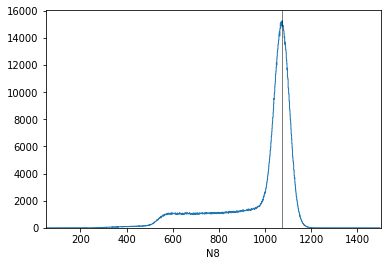

In [21]:
_ = pl.hist(rand['RAND_N8'], bins=np.arange(0, 1500, 1), histtype='step')
pl.axvline(rand.meta['NRAND8'], c='k', lw=0.5)
pl.xlabel(r'$N_8$')
pl.xlim(50., 1500.)

In [22]:
# 100. * np.sqrt(rand.meta['NRAND8']) / rand.meta['NRAND8']

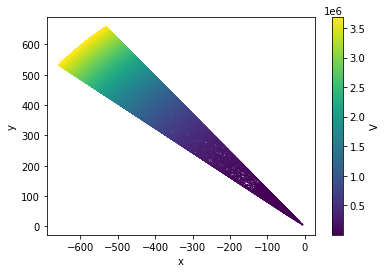

In [23]:
isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_X'][isin], rand['CARTESIAN_Y'][isin], lw=0.0, c=rand['V'][isin], s=2)
pl.xlabel('x')
pl.ylabel('y')
pl.colorbar(label='V')

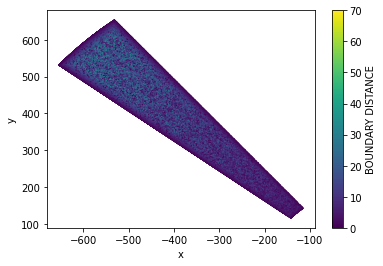

In [24]:
isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_X'][isin], rand['CARTESIAN_Y'][isin], lw=0.0, c=rand['BOUND_DIST'][isin], s=2, vmin=0., vmax=70.)
pl.xlabel('x')
pl.ylabel('y')
pl.colorbar(label='BOUNDARY DISTANCE')

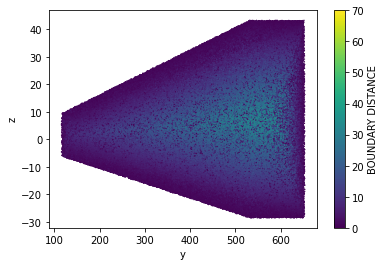

In [25]:
isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_Y'][isin], rand['CARTESIAN_Z'][isin], lw=0.0, c=rand['BOUND_DIST'][isin], s=2, vmin=0., vmax=70.)
pl.xlabel('y')
pl.ylabel('z')
pl.colorbar(label='BOUNDARY DISTANCE')

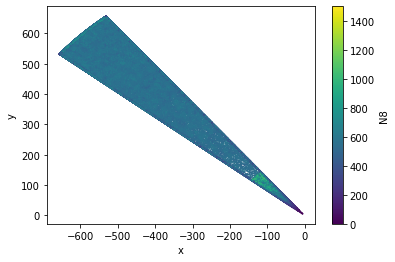

In [27]:
isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_X'][isin], rand['CARTESIAN_Y'][isin], lw=0.0, c=rand['RAND_N8'][isin], vmin=0, vmax=1500, s=2)
pl.xlabel('x')
pl.ylabel('y')
pl.colorbar(label='N8')

(0.2, 1.2)

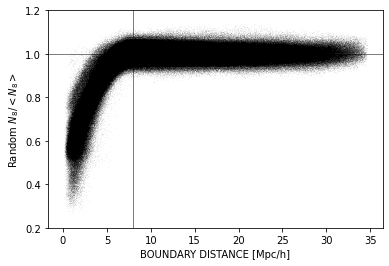

In [30]:
isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['BOUND_DIST'][isin], rand['RAND_N8'][isin] / rand.meta['NRAND8'], marker='.', lw=0.0, s=1, alpha=0.1, c='k')

pl.xlabel('BOUNDARY DISTANCE [Mpc/h]')
pl.ylabel(r'Random $N_8 / <N_8>$')

pl.axhline(1.00, c='k', lw=0.5)
pl.axvline(8.00, c='k', lw=0.5)

pl.ylim(0.2, 1.2)

Text(0.5, 0, 'BOUND_DIST [Mpc/h]')

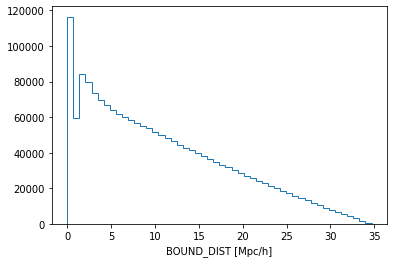

In [31]:
_ = pl.hist(rand['BOUND_DIST'], bins=50, histtype='step')
pl.xlabel('BOUND_DIST [Mpc/h]')

In [32]:
gold = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_ddp_n8.fits')
gold.meta

OrderedDict([('EXTNAME', 'TilingCat'),
             ('TCOMM1', 'GAMA ID'),
             ('TUCD1', 'meta.id;meta.main'),
             ('TCOMM2', 'SDSS objid'),
             ('TUCD2', 'meta.id'),
             ('TCOMM3', 'J2000 coordinate'),
             ('TUCD3', 'pos.eq.ra'),
             ('TCOMM4', 'J2000 coordinate'),
             ('TUCD4', 'pos.eq.dec'),
             ('TCOMM5', '3-arcsec fiber magnitude'),
             ('TUCD5', 'phot.mag;em.opt.R'),
             ('TCOMM6', 'Extinction-corrected SDSS DR7 Petrosian mag'),
             ('TUCD6', 'phot.mag;em.opt.R'),
             ('TCOMM7', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD7', 'phot.mag;em.opt.U'),
             ('TCOMM8', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD8', 'phot.mag;em.opt.B'),
             ('TCOMM9', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD9', 'phot.mag;em.opt.R'),
             ('TCOMM10', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD10', 'phot.mag;em.opt.I

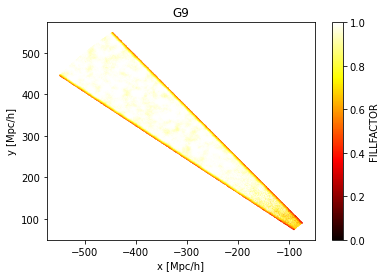

In [33]:
randoms_slice_nolimits = rand[np.abs(rand['CARTESIAN_Z']) < 5.]

# TODO: Get from randoms header when available. 
ddp_zmin = gold.meta['DDP1_ZMIN']
ddp_zmax = gold.meta['DDP1_ZMAX']
        
isin = (randoms_slice_nolimits['Z'] > ddp_zmin) & (randoms_slice_nolimits['Z'] < ddp_zmax)
    
randoms_slice = randoms_slice_nolimits[isin]
    
plt.scatter(randoms_slice['CARTESIAN_X'],\
            randoms_slice['CARTESIAN_Y'],\
            c=randoms_slice['FILLFACTOR'],\
            marker='.',\
            lw=0.0,\
            s=1,\
            vmin=0.,\
            vmax=1.,\
            cmap='hot')

pl.xlabel('x [Mpc/h]')
pl.ylabel('y [Mpc/h]')

pl.colorbar(label='FILLFACTOR')
    
# pl.xlim(0, 1.1 * cosmo.comoving_distance(gold.meta['DDP1_ZMAX']).value)
# pl.ylim(-80., 80.)
    
plt.title('{}'.format(field))
plt.show()

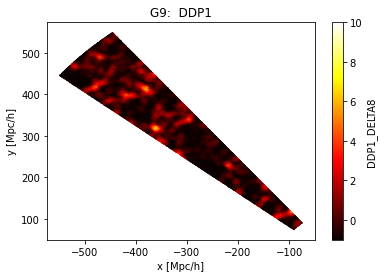

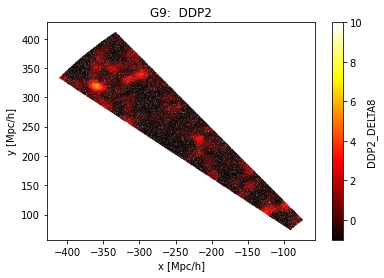

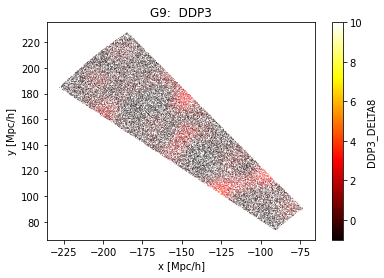

In [35]:
randoms_slice_nolimits = rand[np.abs(rand['CARTESIAN_Z']) < 5.]

for idx in np.arange(1, 4, 1):
    # TODO: Get from randoms header when available. 
    ddp_zmin = gold.meta['DDP{}_ZMIN'.format(idx)]
    ddp_zmax = gold.meta['DDP{}_ZMAX'.format(idx)]
        
    isin = (randoms_slice_nolimits['Z'] > ddp_zmin) & (randoms_slice_nolimits['Z'] < ddp_zmax)
    
    randoms_slice = randoms_slice_nolimits[isin]
    
    plt.scatter(randoms_slice['CARTESIAN_X'],\
                randoms_slice['CARTESIAN_Y'],\
                c=randoms_slice['DDP{}_DELTA8'.format(idx)],\
                marker='.',\
                lw=0.0,\
                s=1,\
                vmin=-1.,\
                vmax=10.,\
                cmap='hot')

    pl.xlabel('x [Mpc/h]')
    pl.ylabel('y [Mpc/h]')

    pl.colorbar(label='DDP{}_DELTA8'.format(idx))
    
    # pl.xlim(0, 1.1 * cosmo.comoving_distance(gold.meta['DDP1_ZMAX']).value)
    # pl.ylim(-80., 80.)
    
    plt.title('{}:  DDP{}'.format(field, idx))
    plt.show()

In [36]:
cmap = plt.cm.tab20c  # define the colormap

# extract all colors from the .jet map

cmaplist = [cmap(i) for i in range(cmap.N)]

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0, 4, 5)
norm   = mpl.colors.BoundaryNorm(bounds, cmap.N)

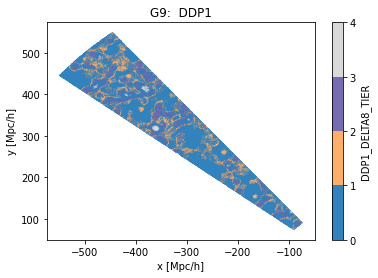

In [39]:
randoms_slice_nolimits = rand[np.abs(rand['CARTESIAN_Z']) < 5.]

for idx in np.arange(1, 2, 1):
    # TODO: Get from randoms header when available. 
    ddp_zmin = gold.meta['DDP{}_ZMIN'.format(idx)]
    ddp_zmax = gold.meta['DDP{}_ZMAX'.format(idx)]
        
    isin = (randoms_slice_nolimits['Z'] > ddp_zmin) & (randoms_slice_nolimits['Z'] < ddp_zmax)
    
    randoms_slice = randoms_slice_nolimits[isin]
    
    plt.scatter(randoms_slice['CARTESIAN_X'],\
                randoms_slice['CARTESIAN_Y'],\
                c=randoms_slice['DDP{}_DELTA8_TIER'.format(idx)],\
                marker='.',\
                lw=0.0,\
                s=1,\
                cmap=cmap,\
                norm=norm)

    pl.xlabel('x [Mpc/h]')
    pl.ylabel('y [Mpc/h]')

    pl.colorbar(label='DDP{}_DELTA8_TIER'.format(idx))
    
    # pl.xlim(0, 1.1 * cosmo.comoving_distance(gold.meta['DDP1_ZMAX']).value)
    # pl.ylim(-80., 80.)
    
    plt.title('{}:  DDP{}'.format(field, idx))
    plt.show()

Text(0, 0.5, 'DDP2_DELTA8')

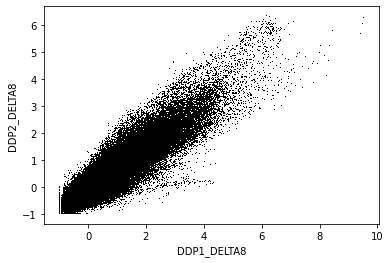

In [40]:
# Larger minimum redshift. 
ddp1_zmin = gold.meta['DDP1_ZMIN']

# Smaller maximum redshift. 
ddp3_zmax = gold.meta['DDP2_ZMAX']
            
isin = (rand['Z'] > ddp1_zmin) & (rand['Z'] < ddp3_zmax)

pl.plot(rand['DDP1_DELTA8'][isin], rand['DDP2_DELTA8'][isin], marker=',', lw=0.0, c='k')

pl.xlabel('DDP1_DELTA8')
pl.ylabel('DDP2_DELTA8')

# Done.